In [30]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [31]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.__version__

'2.3.0'

In [4]:
tf.test.is_built_with_cuda()

True

#Load the dataset

In [32]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

#Data Visualization

In [8]:
def plot_sample(index):
    plt.figure(figsize = (20,2))
    plt.imshow(X_train[index])

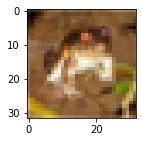

In [9]:
plot_sample(0)

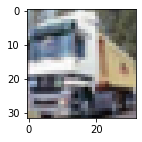

In [10]:
plot_sample(1)

In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

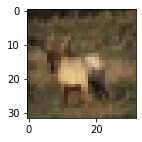

In [12]:
plot_sample(3)

In [13]:
y_train[3]

array([4], dtype=uint8)

In [14]:
classes[y_train[3][0]]

'deer'

'truck'

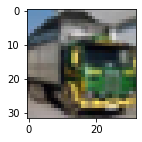

In [15]:
plot_sample(14)
classes[y_train[14][0]]

In [16]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [17]:
y_train[0:3]

array([[6],
       [9],
       [9]], dtype=uint8)

#Preprocessing: Scale images

In [33]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [34]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [20]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#Model building and training

In [50]:
%%timeit -n1 -r1 
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8616 - accuracy: 0.3342
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6569 - accuracy: 0.4146
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5687 - accuracy: 0.4453
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5085 - accuracy: 0.4679
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4579 - accuracy: 0.4848
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4136 - accuracy: 0.5014
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3737 - accuracy: 0.5137
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3399 - accuracy: 0.5289
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3056 - accuracy: 0.5416
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.275

In [39]:
model.history

In [51]:
model.evaluate(X_test_scaled, y_test_categorical,batch_size=128)

79/79 [==============================] - 0s 3ms/step - loss: 1.8033 - accuracy: 0.3381


[1.8032851219177246, 0.33809998631477356]

#Let's make some predictions¶

In [52]:
np.argmax(model.predict(X_test_scaled)[10])

8

In [53]:
classes[np.argmax(model.predict(X_test_scaled)[10])]

'ship'

In [54]:
classes[y_test[10][0]]

'airplane'

#Measure training time on a DIfferent bench

In [7]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

## CPU Time

In [28]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 74s 48ms/step - loss: 1.8584 - accuracy: 0.3363
1 loop, best of 1: 1min 15s per loop


## GPU Time

In [29]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 4s 3ms/step - loss: 1.8628 - accuracy: 0.3343
1 loop, best of 1: 5.07 s per loop
